In [78]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [79]:
# read the data file into a dataframe
df = pd.read_csv('machine_data-1.csv')
print(df)

print(df.shape)

      Unnamed: 0       time       load manufacturer
0              0  20.008150  70.446291            c
1              1  14.014561  73.294634            c
2              2  26.701731  73.840790            A
3              3  14.809997  77.084801            B
4              4  10.626743  75.508418            c
...          ...        ...        ...          ...
1224        1224  11.964054  74.560155            c
1225        1225   9.787055  76.166923            c
1226        1226  22.561823  75.862420            A
1227        1227  25.499175  74.393778            A
1228        1228  13.919766  77.704726            B

[1229 rows x 4 columns]
(1229, 4)


In [80]:
#Drop the index
df.drop(df.columns[0],axis=1)

,time,load,manufacturer
0,20.008150,70.446291,c
1,14.014561,73.294634,c
2,26.701731,73.840790,A
3,14.809997,77.084801,B
4,10.626743,75.508418,c
...,...,...,...
1224,11.964054,74.560155,c
1225,9.787055,76.166923,c
1226,22.561823,75.862420,A
1227,25.499175,74.393778,A


In [81]:
#Extract data for a given manufacturer
grpByManu = df.groupby(['manufacturer'])

dfa = grpByManu.get_group(('A',))
dfb = grpByManu.get_group(('B',))
dfc = grpByManu.get_group(('c',))

### 1. What is the range of load and time during operation for each manufacturer?

In [82]:
print("A", dfa[['load', 'time']].describe())
print("B", dfb[['load', 'time']].describe())
print("C", dfc[['load', 'time']].describe())

A              load        time
count  415.000000  415.000000
mean    74.497625   25.685249
std      2.146885    4.614101
min     67.770206   15.276417
25%     73.130892   22.346025
50%     74.464071   25.350244
75%     75.977757   28.329017
max     80.541808   44.283424
B              load        time
count  403.000000  403.000000
mean    74.686092   19.230276
std      2.058642    4.049431
min     68.364413   10.881338
25%     73.373177   16.424144
50%     74.690345   18.816761
75%     76.050307   21.465888
max     80.167333   35.422287
C              load        time
count  411.000000  411.000000
mean    74.376665   12.696966
std      2.167851    3.480629
min     68.892794    4.519349
25%     72.995104   10.073778
50%     74.335344   12.305028
75%     75.935922   14.549230
max     82.348464   24.296367


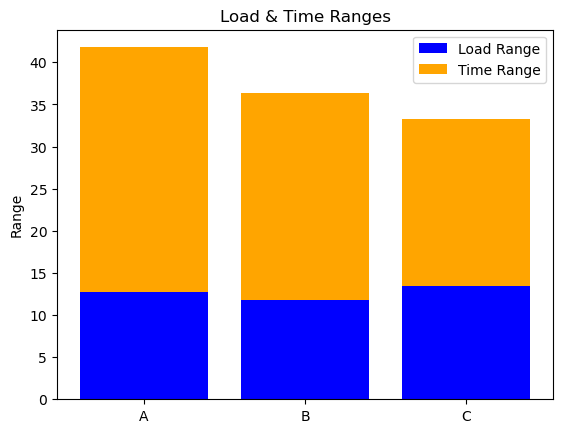

1. Answer:
Dataset A - Load Range: 12.771602059999992, Time Range: 29.00700703
Dataset B - Load Range: 11.802919920000008, Time Range: 24.540948810000003
Dataset C - Load Range: 13.45567029, Time Range: 19.777017565


In [83]:
rLoadA, rTimeA = dfa[['load', 'time']].max() - dfa[['load', 'time']].min()
rLoadB, rTimeB = dfb[['load', 'time']].max() - dfb[['load', 'time']].min()
rLoadC, rTimeC = dfc[['load', 'time']].max() - dfc[['load', 'time']].min()

datasets = ['A', 'B', 'C']
rLoad = [rLoadA, rLoadB, rLoadC]
rTime = [rTimeA, rTimeB, rTimeC]

plt.bar(datasets, rLoad, label='Load Range', color='blue')
plt.bar(datasets, rTime, label='Time Range', color='orange', bottom=rLoad)

plt.ylabel('Range')
plt.title('Load & Time Ranges')
plt.legend()
plt.show()

#exact numbers for the ranges
print("\033[1m1. Answer:\033[0m")
print(f"Dataset A - Load Range: {rLoadA}, Time Range: {rTimeA}")
print(f"Dataset B - Load Range: {rLoadB}, Time Range: {rTimeB}")
print(f"Dataset C - Load Range: {rLoadC}, Time Range: {rTimeC}")

### 2. What is the most expected load value?

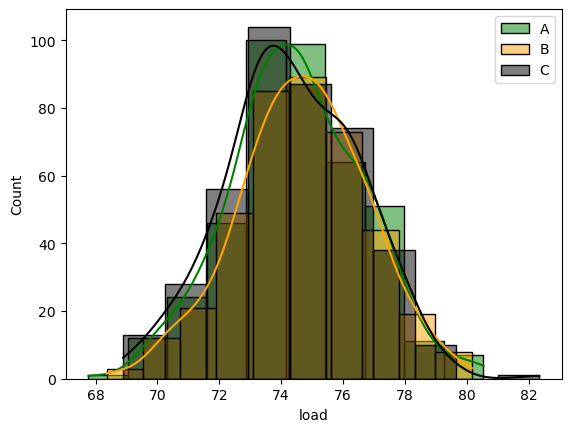

In [84]:
sns.histplot(dfa['load'], bins=10, kde=True, label='A', color='green', alpha=0.5)
sns.histplot(dfb['load'], bins=10, kde=True, label='B', color='orange', alpha=0.5)
sns.histplot(dfc['load'], bins=10, kde=True, label='C', color='black', alpha=0.5)
plt.legend()
plt.show()

**2. Answer:** By looking at the histogram it is clear that the most expected load value is around 74-75.

### 3. How are the load and time related?

In [85]:
loada = dfa['load']
timea = dfa['time']
loadb = dfb['load']
timeb = dfb['time']
loadc = dfc['load']
timec = dfc['time']

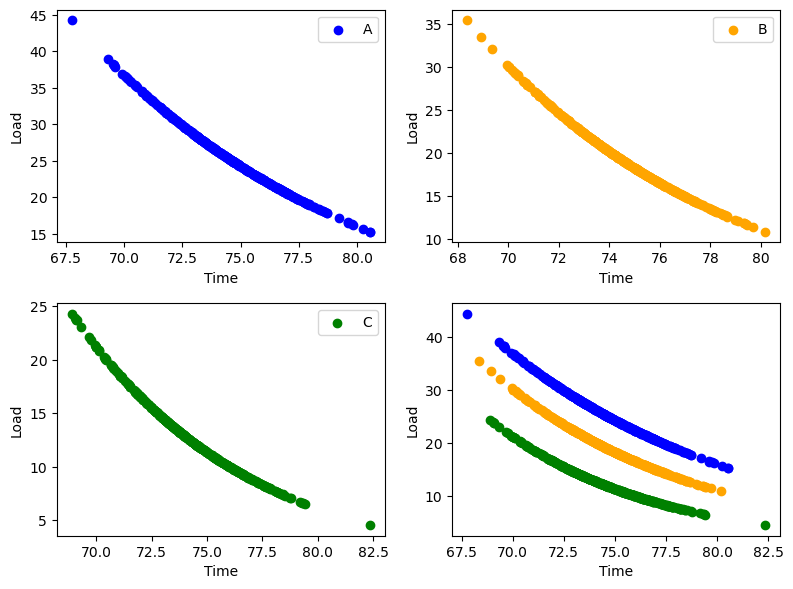

In [86]:
figure,axis = plt.subplots(2,2, figsize=(8, 6))
axis[0, 0].scatter(loada, timea, color="blue", label="A")
axis[0, 0].legend()
axis[0, 0].set_xlabel("Time")
axis[0, 0].set_ylabel("Load")

axis[0, 1].scatter(loadb, timeb, color="orange", label="B")
axis[0, 1].legend()
axis[0, 1].set_xlabel("Time")
axis[0, 1].set_ylabel("Load")

axis[1, 0].scatter(loadc, timec, color="green", label="C")
axis[1, 0].legend()
axis[1, 0].set_xlabel("Time")
axis[1, 0].set_ylabel("Load")

axis[1, 1].scatter(loada, timea, color="blue")
axis[1, 1].scatter(loadb, timeb, color="orange")
axis[1, 1].scatter(loadc, timec, color="green")
axis[1, 1].set_xlabel("Time")
axis[1, 1].set_ylabel("Load")
plt.tight_layout()
plt.show()

**3. Answer:** From the scatterplots above it is apparent that higher loads lead to shorter operating time, which make sense since it is doing more work at the same time.
They all seem to follow the same pattern but A gets the highest load for the same amount of time.

### 4. Which distribution best describes the load?

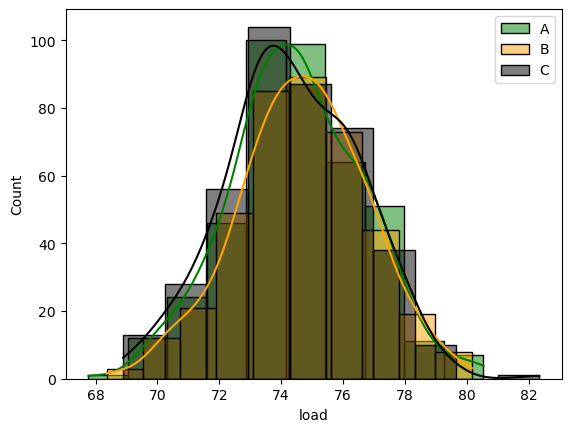

In [87]:
# seaborn for histogram plotting to easily see the kde line and see the distribution
sns.histplot(dfa['load'], bins=10, kde=True, label='A', color='green', alpha=0.5)
sns.histplot(dfb['load'], bins=10, kde=True, label='B', color='orange', alpha=0.5)
sns.histplot(dfc['load'], bins=10, kde=True, label='C', color='black', alpha=0.5)

plt.legend()
plt.show()

**4. Answer:** I would say that load for all manufactorers is following the normal distribution.

### 5. Which distribution best describes the time?

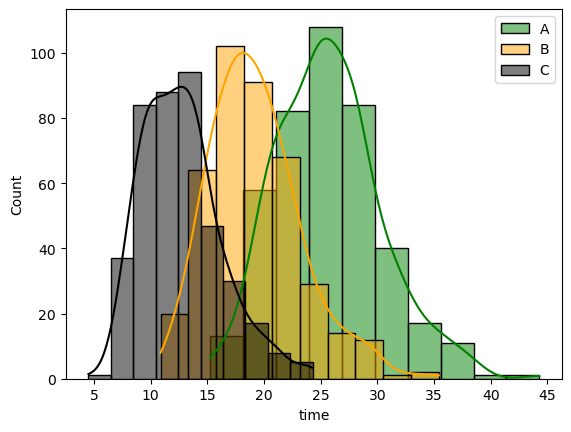

In [88]:
sns.histplot(dfa['time'], bins=10, kde=True, label='A', color='green', alpha=0.5)
sns.histplot(dfb['time'], bins=10, kde=True, label='B', color='orange', alpha=0.5)
sns.histplot(dfc['time'], bins=10, kde=True, label='C', color='black', alpha=0.5)

plt.legend()
plt.show()

**5. Answer:** They all seem to follow log-normal distribution.

### 6. Which manufacturer has the best performance and why?

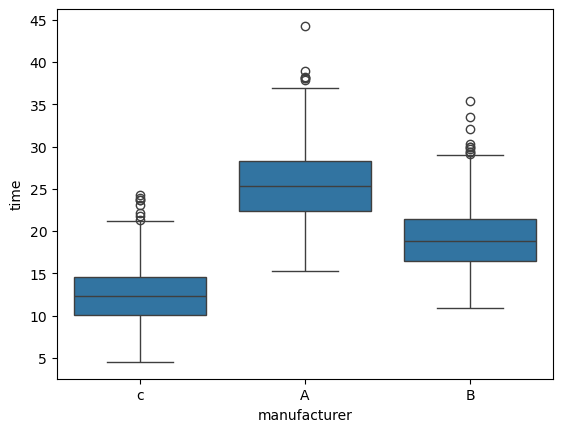

A 25.685249066048193  B 19.230276397791563  C 12.696966214481753


In [89]:
sns.boxplot(x=df['manufacturer'], y=df['time'])
plt.show()

print("A", dfa['time'].mean(), " B", dfb['time'].mean()," C", dfc['time'].mean())

**6. Answer:** Since A also had the highest load one would guess they break faster but by looking at the mean of time it also lasts the longest and therefore got the best performance. 